#Project

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [10]:
df = pd.read_csv('/content/drive/MyDrive/Train.csv')
print(df.info())
print(df.shape)
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18483 entries, 0 to 18482
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  18483 non-null  object 
 1   Category              18483 non-null  object 
 2   Brand                 18483 non-null  object 
 3   Day_of_Week           18483 non-null  int64  
 4   Holiday_Indicator     18483 non-null  int64  
 5   Past_Purchase_Trends  18483 non-null  float64
 6   Price                 18483 non-null  float64
 7   Discount              18483 non-null  float64
 8   Competitor_Price      18483 non-null  float64
 9   Sales_Quantity        18019 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.4+ MB
None
(18483, 10)
Index(['Date', 'Category', 'Brand', 'Day_of_Week', 'Holiday_Indicator',
       'Past_Purchase_Trends', 'Price', 'Discount', 'Competitor_Price',
       'Sales_Quantity'],
      dtype='object')


##Cleaning


In [11]:
# Check how many missing values
print(df.isnull().sum())

# Fill missing Sales_Quantity with mean (or median if skewed)
df['Sales_Quantity'].fillna(df['Sales_Quantity'].mean(), inplace=True)


Date                      0
Category                  0
Brand                     0
Day_of_Week               0
Holiday_Indicator         0
Past_Purchase_Trends      0
Price                     0
Discount                  0
Competitor_Price          0
Sales_Quantity          464
dtype: int64


/tmp/ipython-input-11-3715494070.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sales_Quantity'].fillna(df['Sales_Quantity'].mean(), inplace=True)


In [12]:
df['Sales_Quantity'].fillna(df['Sales_Quantity'].mean(), inplace=True)


/tmp/ipython-input-12-1908481497.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sales_Quantity'].fillna(df['Sales_Quantity'].mean(), inplace=True)


In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis=1, inplace=False)


/tmp/ipython-input-13-3786608719.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


,Category,Brand,Day_of_Week,Holiday_Indicator,Past_Purchase_Trends,Price,Discount,Competitor_Price,Sales_Quantity,Month,Day
0,Automotive,BrandA,3,0,17.9,462.30,33.96,359.45,227.0,9,26
1,Automotive,BrandA,3,0,66.3,321.28,24.76,49.47,370.0,9,26
2,Automotive,BrandA,3,0,14.4,74.85,32.19,245.11,299.0,9,26
3,Automotive,BrandA,3,0,34.7,469.12,43.68,144.08,426.0,9,26
4,Automotive,BrandA,6,1,93.5,221.76,36.79,478.07,470.0,9,22
...,...,...,...,...,...,...,...,...,...,...,...
18478,Toys,BrandF,3,0,22.0,266.55,18.33,383.05,359.0,2,18
18479,Toys,BrandF,2,0,48.4,481.87,23.41,469.83,333.0,10,2
18480,Toys,BrandF,1,0,50.7,123.81,46.73,214.11,132.0,2,2
18481,Toys,BrandF,0,0,73.4,77.95,10.07,82.28,274.0,1,25


In [14]:
from sklearn.preprocessing import LabelEncoder

le_cat = LabelEncoder()
le_brand = LabelEncoder()

df['Category'] = le_cat.fit_transform(df['Category'])
df['Brand'] = le_brand.fit_transform(df['Brand'])


In [16]:
# Optional: If you still have the original data
df['Date'] = pd.to_datetime(df['Date'])  # use backup


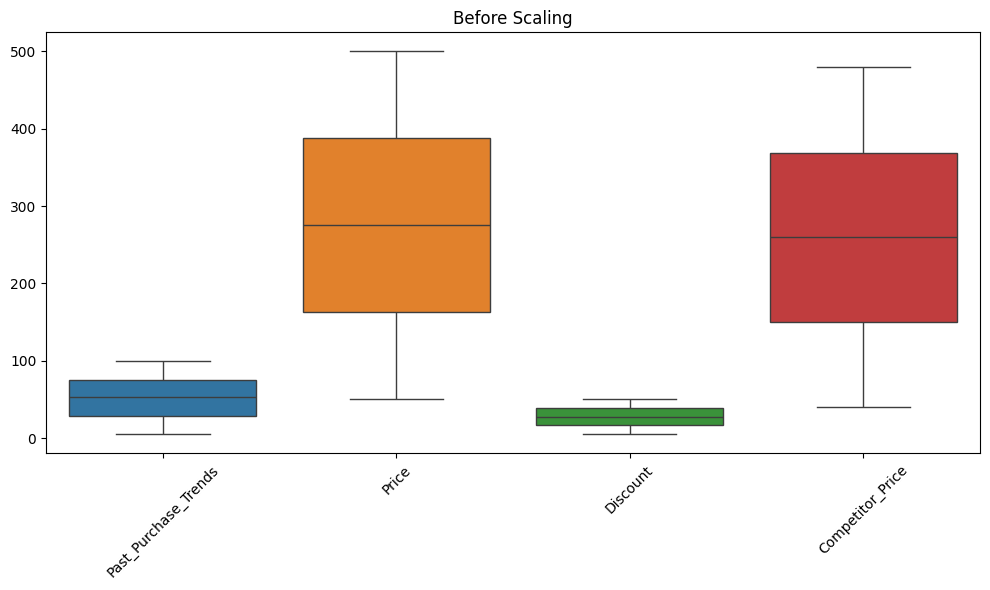

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features before scaling
num_cols = ['Past_Purchase_Trends', 'Price', 'Discount', 'Competitor_Price']

# Before Scaling
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[num_cols])
plt.title("Before Scaling")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [24]:
X_train = X_train.drop(['Date'], axis=1)
X_test = X_test.drop(['Date'], axis=1)

# Then scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [22]:
from sklearn.model_selection import train_test_split

X = df.drop('Sales_Quantity', axis=1)
y = df['Sales_Quantity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


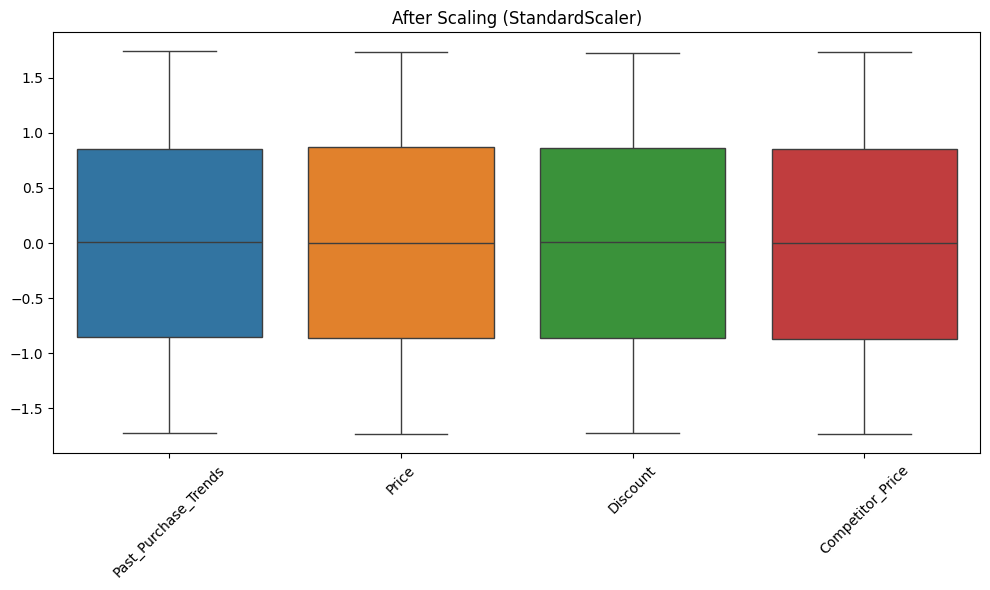

In [26]:
# After Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[num_cols])
scaled_df = pd.DataFrame(scaled_data, columns=num_cols)

plt.figure(figsize=(10, 6))
sns.boxplot(data=scaled_df)
plt.title("After Scaling (StandardScaler)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and fit the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr.predict(X_test_scaled)

# Evaluation metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Print results
print("🔹 Linear Regression Results")
print(f"R² Score: {r2_lr}")
print(f"MAE: {mae_lr}")
print(f"RMSE: {rmse_lr}")


🔹 Linear Regression Results
R² Score: -0.0006363454712852157
MAE: 119.85181991976897
RMSE: 140.39697568687595


In [29]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and fit the model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)

# Predict
y_pred_dt = dt.predict(X_test_scaled)

# Evaluation metrics
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Print results
print("🔹 Decision Tree Regressor Results")
print(f"R² Score: {r2_dt}")
print(f"MAE: {mae_dt}")
print(f"RMSE: {rmse_dt}")


🔹 Decision Tree Regressor Results
R² Score: -1.013031152448387
MAE: 163.03389996040454
RMSE: 199.13374615600048


In [30]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and fit the model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict
y_pred_knn = knn.predict(X_test_scaled)

# Evaluation metrics
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Print results
print("🔹 KNN Regressor Results")
print(f"R² Score: {r2_knn}")
print(f"MAE: {mae_knn}")
print(f"RMSE: {rmse_knn}")


🔹 KNN Regressor Results
R² Score: -0.1878353781322808
MAE: 128.30725219673525
RMSE: 152.96699810939427


In [31]:
from sklearn.svm import SVR

# Initialize and fit the model
svr = SVR()
svr.fit(X_train_scaled, y_train)

# Predict
y_pred_svr = svr.predict(X_test_scaled)

# Evaluation metrics
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Print results
print("🔹 SVR Results")
print(f"R² Score: {r2_svr}")
print(f"MAE: {mae_svr}")
print(f"RMSE: {rmse_svr}")


🔹 SVR Results
R² Score: -0.0001716950825618735
MAE: 119.82424933817337
RMSE: 140.3643748901481


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# 1. Load Data
df = pd.read_csv("/content/drive/MyDrive/Train.csv")  # replace with actual file

# 2. Handle missing values
df['Sales_Quantity'].fillna(df['Sales_Quantity'].mean(), inplace=True)

# 3. Feature engineering from Date
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.drop(columns=['Date'], inplace=True)

# 4. Encode categorical columns
df = pd.get_dummies(df, columns=['Category', 'Brand', 'Day_of_Week'], drop_first=True)

# 5. Additional feature engineering
df['Price*Discount'] = df['Price'] * df['Discount']
df['Price_Diff'] = df['Price'] - df['Competitor_Price']

# 6. Remove highly correlated or low-impact features if necessary
# Optional: heatmap
# sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
# plt.show()

# 7. Feature Scaling
X = df.drop('Sales_Quantity', axis=1)
y = df['Sales_Quantity']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 8. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 9. Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf', C=1.0, epsilon=0.2),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

# 10. Evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{name}")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")



Linear Regression
R² Score: -0.0005
MAE: 119.8899
RMSE: 140.3884

Random Forest
R² Score: -0.0296
MAE: 121.3742
RMSE: 142.4157

Gradient Boosting
R² Score: -0.0098
MAE: 120.4928
RMSE: 141.0390

Support Vector Regressor
R² Score: -0.0000
MAE: 119.7926
RMSE: 140.3529

KNN
R² Score: -0.1911
MAE: 128.4318
RMSE: 153.1792
